# 多项式回归-通过年龄预测医疗费用


In [6]:
# 导入相关库
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [2]:
# 导入数据
data=pd.read_csv("./data/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


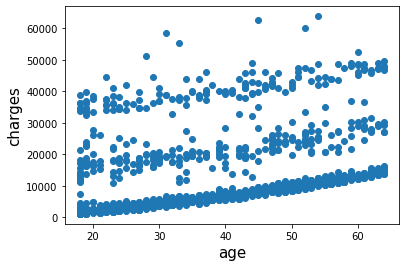

In [3]:
# 数据预处理
data.info()
#观察可知没有缺失数据

#观察有无异常值
plt.figure()
plt.scatter(data["age"],data["charges"])
plt.xlabel("age",fontsize=15)
plt.ylabel("charges",fontsize=15)
plt.show()

Int64Index([   0,    3,   14,   19,   23,   29,   30,   34,   38,   49,
            ...
            1291, 1306, 1307, 1308, 1313, 1314, 1315, 1318, 1328, 1331],
           dtype='int64', length=192) Int64Index([  52,   85,  123,  146,  153,  156,  160,  224,  265,  297,  312,
             327,  334,  355,  411,  461,  473,  488,  524,  545,  549,  569,
             615,  617,  629,  641,  644,  658,  665,  674,  688,  697,  757,
             818,  828,  852,  854,  856,  876,  893,  896,  916,  917,  936,
             953,  958,  959,  987, 1003, 1007, 1011, 1022, 1030, 1037, 1045,
            1049, 1053, 1057, 1090, 1112, 1152, 1171, 1188, 1191, 1218, 1272,
            1281, 1300, 1303, 1304, 1323],
           dtype='int64') Int64Index([   9,   11,   39,   45,   55,   58,   62,   86,   92,   94,   98,
             103,  109,  115,  138,  175,  227,  242,  244,  245,  251,  252,
             256,  262,  264,  281,  288,  289,  301,  328,  330,  331,  379,
             381,  382,  419, 

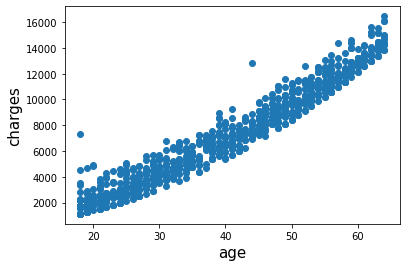

In [4]:
# 由于是构造一元线性模型，故只保留最下方的密集数据
print(data[(data["age"]<40 ) & (data["charges"]>10000)].index,
      data[(data["age"]>40 ) & (data["age"]<50 ) & (data["charges"]>13000)].index,
     data[(data["age"]>50 ) & (data["charges"]>18000)].index)
data=data.drop(data[(data["age"]<40 ) & (data["charges"]>10000)].index)
data=data.drop(data[(data["age"]>=40 ) & (data["age"]<50 ) & (data["charges"]>13000)].index)
data=data.drop(data[(data["age"]>=50 ) & (data["charges"]>18000)].index)

#观察删除后结果
plt.figure()
plt.scatter(data["age"],data["charges"])
plt.xlabel("age",fontsize=15)
plt.ylabel("charges",fontsize=15)
plt.show()

In [29]:
# 分离自变量和因变量
X=data["age"]
Y=data["charges"]
# 创建高次的自变量
poly_reg=PolynomialFeatures(degree=4,include_bias=False)
X=poly_reg.fit_transform(X.values.reshape(-1,1))
print(X)
Y=Y.values.reshape(-1,1)
print(X.shape,Y.shape)

[[1.800000e+01 3.240000e+02 5.832000e+03 1.049760e+05]
 [2.800000e+01 7.840000e+02 2.195200e+04 6.146560e+05]
 [3.200000e+01 1.024000e+03 3.276800e+04 1.048576e+06]
 ...
 [1.800000e+01 3.240000e+02 5.832000e+03 1.049760e+05]
 [1.800000e+01 3.240000e+02 5.832000e+03 1.049760e+05]
 [2.100000e+01 4.410000e+02 9.261000e+03 1.944810e+05]]
(967, 4) (967, 1)


In [30]:
?PolynomialFeatures

In [34]:
# 拆分训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (773, 4)
x_test (194, 4)
y_train (773, 1)
y_test (194, 1)


In [35]:
# 构建线性模型 -默认情况，即fit_intercept=True, normalize=False
reg=LinearRegression()
reg.fit(x_train,y_train)
# 对测试集生成预测结果
y_pre=reg.predict(x_test)
# 进行r2评分
r2_score(y_test,y_pre)

0.9582159232732479

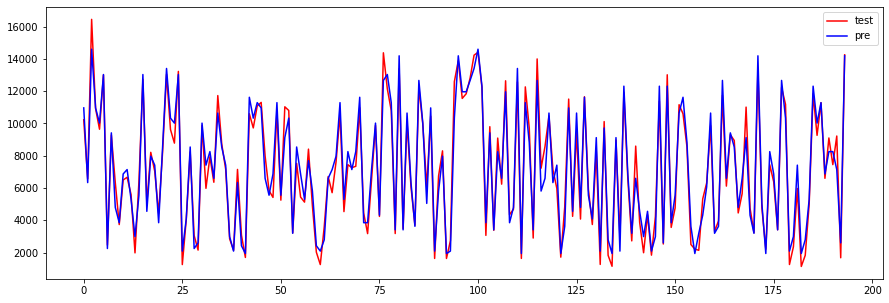

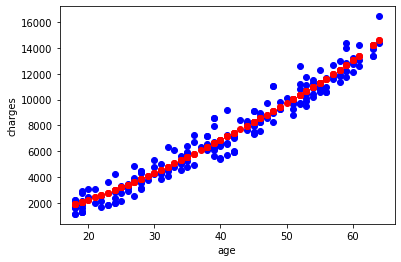

In [36]:
# 可视化测试集预测误差
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)),y_test,'r',label="test")
plt.plot(range(len(y_test)),y_pre,'b',label="pre")
plt.legend()
plt.show()

# 利用散点图观察预测值和真实值的拟合效果
plt.scatter(x_test[:,0],y_test,color="blue")
plt.scatter(x_test[:,0],y_pre,color="red")
plt.xlabel("age")
plt.ylabel("charges")
plt.show()